In [1]:
import matplotlib.pyplot as plt
import numpy as np

from algorithms import pso, de
from problems import rosenbrock, rosen_boundaries
from utils import repeat

import pyswarms as ps

In [2]:
nparticles = 30
repetition = 30

c1 = 0.5
c2 = 0.5
w = 0.8

results = repeat(repetition, pso.minimize, rosenbrock, rosen_boundaries(2), nparticles, w, c1, c2, 100)
pso_exp = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

In [3]:
repetition = 30
N = 30
F = 0.8
Cr = 0.8
NP = 100


results = repeat(repetition, de.minimize, rosenbrock, rosen_boundaries(2), NP, F, Cr, x=de.mutation.best, y=2, max_iter=100)
de_exp = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

In [4]:
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
from pymoo.termination import get_termination

class SavePopulationCallback(Callback):
    def __init__(self):
        super().__init__()
        self.data = []

    def notify(self, algorithm):
        # append the deep copy of current population to data list
        best_idx = np.argmin(algorithm.pop.get("F"))
        best_x = np.float32(algorithm.pop.get("X")[best_idx])
        best_f = np.float32(algorithm.pop.get("F")[best_idx])
        self.data.append((best_x, best_f))



problem = get_problem("rosenbrock", n_var=2)
termination = get_termination("n_gen", 100)
pymoo_pso = PSO()

pymoo_pso_exp = []
for i in range(30):
    callback = SavePopulationCallback()
    res = minimize(problem,
                pymoo_pso,
                termination=termination,
                seed=np.random.randint(0, 10000),
                callback=callback)
    pymoo_pso_exp.append(callback.data)
    
pymoo_pso_exp = np.array(pymoo_pso_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/1602951186.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pymoo_pso_exp = np.array(pymoo_pso_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])


In [5]:

options = {'c1': 0.5, 'c2': 0.3, 'w':0.8}

ps_exp = []
for _ in range(30):
    optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options)
    _ = optimizer.optimize(rosenbrock, iters=100)
    ps_exp.append(optimizer.cost_history)
ps_exp = np.array(ps_exp)

2024-06-02 18:05:25,526 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=191
2024-06-02 18:05:25,589 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 190.52957455152642, best pos: [0.00444926 0.36989582]
2024-06-02 18:05:25,592 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=177  
2024-06-02 18:05:25,616 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 176.94579015725174, best pos: [0.12981482 0.71986052]
2024-06-02 18:05:25,619 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=129  
2024-06-02 18:05:25,642 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 128.50161585449766

## Optimizing parameters

In [6]:
def rosen_pso(X):
    w, c1, c2 = X
    result = pso.minimize(rosenbrock, rosen_boundaries(2), 30, w, c1, c2, 100)
    return np.min(np.array(list(result), dtype=[('best_x', float, (2,)), ('fitness', float)])["fitness"])

In [30]:
result = pso.minimize(rosen_pso, [[0, 2]]*3, 10, 0.8, 0.5, 0.5, 30)
tuner = np.array(list(result), dtype=[('best_x', float, (3,)), ('fitness', float)])

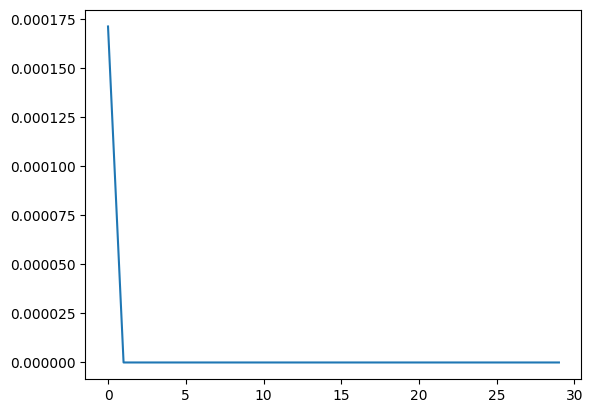

In [32]:
plt.plot(tuner["fitness"])
plt.show()

In [8]:
nparticles = 30
repetition = 30

w, c1, c2 = tuner["best_x"][np.argmin(tuner["fitness"])]


results = repeat(repetition, pso.minimize, rosenbrock, rosen_boundaries(2), nparticles, w, c1, c2, 100)
pso_tuned_exp = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

In [11]:
w, c1, c2 = tuner["best_x"][np.argmin(tuner["fitness"])]
options = {'c1': c1, 'c2': c2, 'w': w}

tuned_ps_exp = []
for _ in range(30):
    optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=2, options=options)
    _ = optimizer.optimize(rosenbrock, iters=100)
    tuned_ps_exp.append(optimizer.cost_history)
tuned_ps_exp = np.array(tuned_ps_exp)

2024-06-02 18:08:05,055 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': -1.9935943073680746, 'c2': 1.8029377355434282, 'w': -0.2815421905025482}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=163  
2024-06-02 18:08:05,122 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 162.84420486791817, best pos: [0.71544202 0.08053194]
2024-06-02 18:08:05,124 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': -1.9935943073680746, 'c2': 1.8029377355434282, 'w': -0.2815421905025482}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=325  
2024-06-02 18:08:05,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 324.8124185236854, best pos: [0.069406   0.18949936]
2024-06-02 18:08:05,148 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': -1.9935943073680746, 'c2': 1.8029377355434282, 'w': -0.2815421905025482}
pyswarms.single.global_best: 100%|██████████

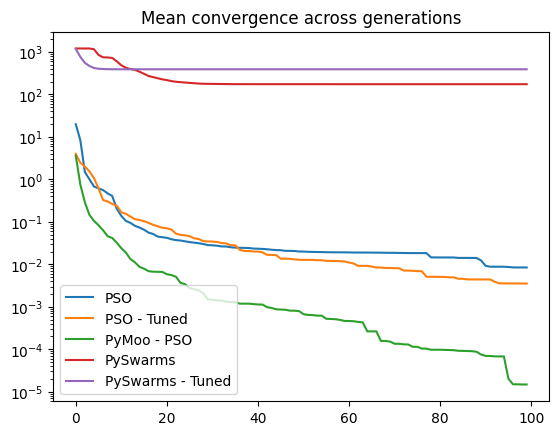

In [13]:
# plt.plot(np.mean(de_exp["fitness"], axis=0), label="DE/BEST/2")
plt.plot(np.mean(pso_exp["fitness"], axis=0), label="PSO")
plt.plot(np.mean(pso_tuned_exp["fitness"], axis=0), label="PSO - Tuned")
plt.plot(np.mean(pymoo_pso_exp["fitness"], axis=0), label="PyMoo - PSO")
plt.plot(np.mean(ps_exp, axis=0), label="PySwarms")
plt.plot(np.mean(tuned_ps_exp, axis=0), label="PySwarms - Tuned")
plt.title("Mean convergence across generations")
plt.legend()
plt.yscale("log")
plt.show()

/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/1618321239.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


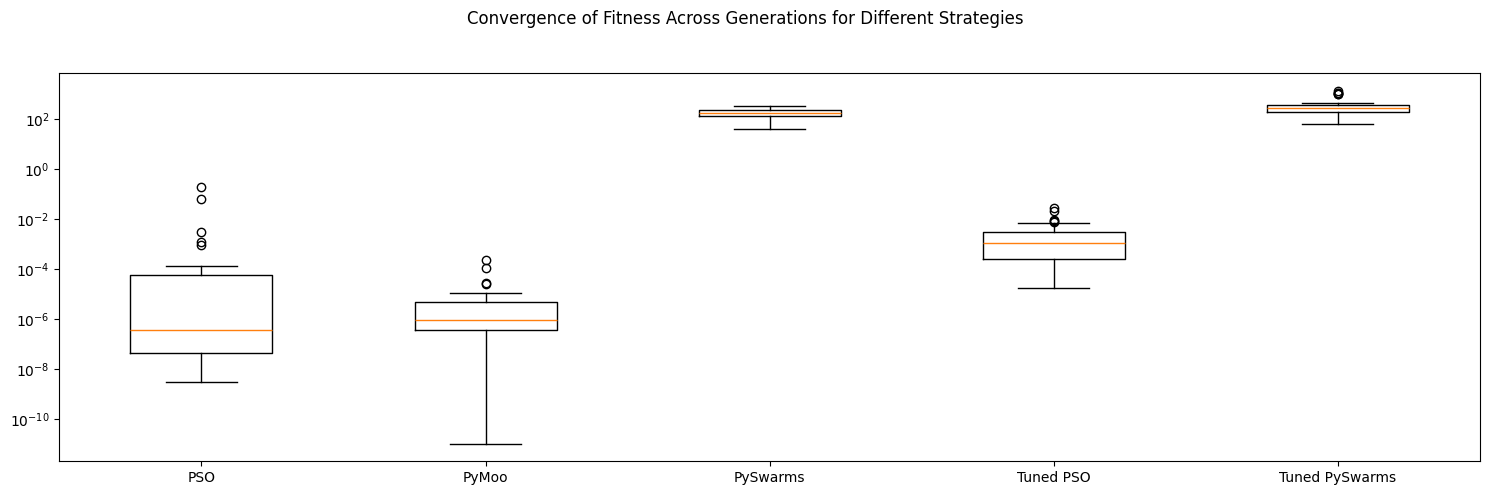

In [14]:
fig = plt.figure(figsize=(15, 5))

data = [pso_exp["fitness"][:, 99]] + [pymoo_pso_exp["fitness"][:, 99]] + [ps_exp[:, 99]] + [pso_tuned_exp["fitness"][:, 99]] + [tuned_ps_exp[:, 99]]

labels = ["PSO", "PyMoo", "PySwarms", "Tuned PSO", "Tuned PySwarms"]
plt.boxplot(data, labels=labels)
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Strategies")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/3083617072.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


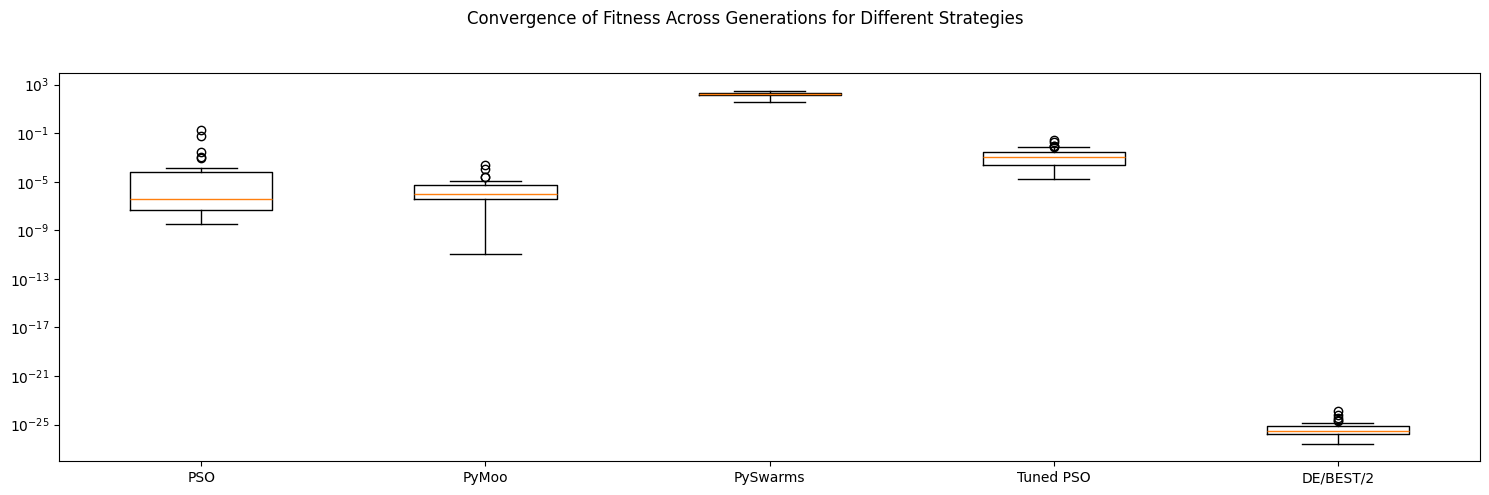

In [15]:
fig = plt.figure(figsize=(15, 5))

data = [pso_exp["fitness"][:, 99]] + [pymoo_pso_exp["fitness"][:, 99]] + [ps_exp[:, 99]] + [pso_tuned_exp["fitness"][:, 99]] + [de_exp["fitness"][:, 99]]

labels = ["PSO", "PyMoo", "PySwarms", "Tuned PSO", "DE/BEST/2"]
plt.boxplot(data, labels=labels)
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Strategies")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

## Small Circuit

In [16]:
def cost_function(I):

    # parâmetros fixos
    U = 10
    R = 100
    I_s = 9.4e-12
    v_t = 25.85e-3

    # cálculo do custo
    c = abs(U - v_t * np.log(abs(I / I_s)) - R * I)
    return c

/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/2424090490.py:10: RuntimeWarning: divide by zero encountered in log
  c = abs(U - v_t * np.log(abs(I / I_s)) - R * I)


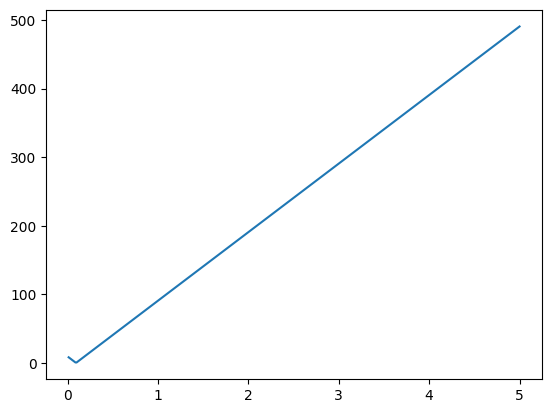

In [17]:
#@title defining the bounds
np_func = np.vectorize(cost_function)
X = np.linspace(0, 5, 400)
Z = np_func(X)

plt.plot(X, Z)

In [18]:
results = repeat(repetition, pso.minimize, np.vectorize(cost_function), [[0,1]], 30, 0.8, 0.5, 0.5, 30)
circuit_exp = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

In [19]:
from pymoo.core.problem import Problem


class Circuit(Problem):

    def __init__(self):
        super().__init__(n_var=1, n_obj=1, n_constr=0, xl=0.0, xu=1.0)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = np.vectorize(cost_function)(x)

termination = get_termination("n_gen", 30)
pymoo_pso = PSO()

pymoo_circuit = []
for i in range(30):
    callback = SavePopulationCallback()
    res = minimize(Circuit(),
                pymoo_pso,
                termination=termination,
                seed=np.random.randint(0, 10000),
                callback=callback)
    pymoo_circuit.append(callback.data)
    
pymoo_circuit = np.array(pymoo_circuit, dtype=[('best_x', float, (2,)), ('fitness', float)])

/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/1873043680.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pymoo_circuit = np.array(pymoo_circuit, dtype=[('best_x', float, (2,)), ('fitness', float)])


In [20]:
def cost_function_ps(I):

    # parâmetros fixos
    U = 10
    R = 100
    I_s = 9.4e-12
    v_t = 25.85e-3

    # cálculo do custo
    c = abs(U - v_t * np.log(abs(I[:, 0] / I_s)) - R * I[:, 0])
    return c

options = {'c1': 0.5, 'c2': 0.3, 'w':0.8}

ps_circuit = []
for _ in range(30):
    optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=1, options=options)
    _ = optimizer.optimize(cost_function_ps, iters=30)
    ps_circuit.append(optimizer.cost_history)
ps_circuit = np.array(ps_circuit)

2024-06-02 18:11:50,726 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=0.0193
2024-06-02 18:11:50,742 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01932288890488998, best pos: [0.09424039]
2024-06-02 18:11:50,747 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=0.0358
2024-06-02 18:11:50,766 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.03584636411343034, best pos: [0.09369021]
2024-06-02 18:11:50,770 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=0.00629
2024-06-02 18:11:50,779 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.006288973797929032, best pos: [0.094110

In [21]:
# Tuning

def circuit_pso(X):
    w, c1, c2 = X
    result = pso.minimize(np.vectorize(cost_function), [[0, 1]], 30, w, c1, c2, 30)
    return np.min(np.array(list(result), dtype=[('best_x', float, (2,)), ('fitness', float)])["fitness"])

result = pso.minimize(circuit_pso, [[0, 2]]*3, 10, 0.8, 0.5, 0.5, 30)
tuner = np.array(list(result), dtype=[('best_x', float, (3,)), ('fitness', float)])

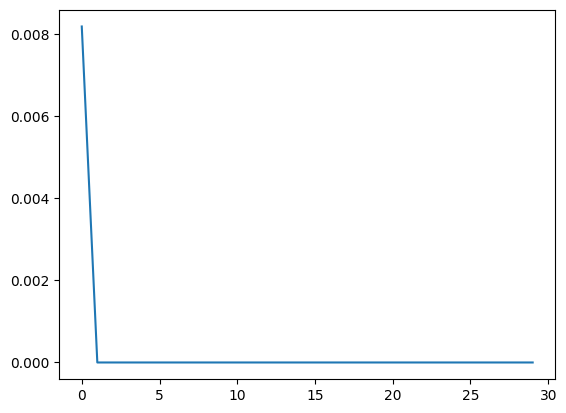

In [28]:
plt.plot(tuner["fitness"])

In [22]:
repetition = 30

w, c1, c2 = tuner["best_x"][np.argmin(tuner["fitness"])]

results = repeat(repetition, pso.minimize, np.vectorize(cost_function), [[0, 1]], 30, w, c1, c2, 30)
tuned_circuit = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

In [24]:
w, c1, c2 = tuner["best_x"][np.argmin(tuner["fitness"])]
options = {'c1': c1, 'c2': c2, 'w': w}

tuned_ps_circuit = []
for _ in range(30):
    optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=1, options=options)
    _ = optimizer.optimize(cost_function_ps, iters=30)
    tuned_ps_circuit.append(optimizer.cost_history)
tuned_ps_circuit = np.array(tuned_ps_circuit)

2024-06-02 18:12:52,635 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': -0.18838393850784452, 'c2': 0.9748300625280266, 'w': 0.008189816317498898}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=3.55e-15
2024-06-02 18:12:52,662 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.552713678800501e-15, best pos: [0.09404769]
2024-06-02 18:12:52,667 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': -0.18838393850784452, 'c2': 0.9748300625280266, 'w': 0.008189816317498898}
pyswarms.single.global_best: 100%|██████████|30/30, best_cost=3.11e-13
2024-06-02 18:12:52,682 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.1086244689504383e-13, best pos: [0.09404769]
2024-06-02 18:12:52,690 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': -0.18838393850784452, 'c2': 0.9748300625280266, 'w': 0.008189816317498898}
pyswarms.single.global_best: 100%|██████████|30/30, b

In [23]:
results = repeat(30, de.minimize, np.vectorize(cost_function), [[0,1]], 30, 0.8, 0.8, x=de.mutation.best, y=2, max_iter=30)
de_circuit = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

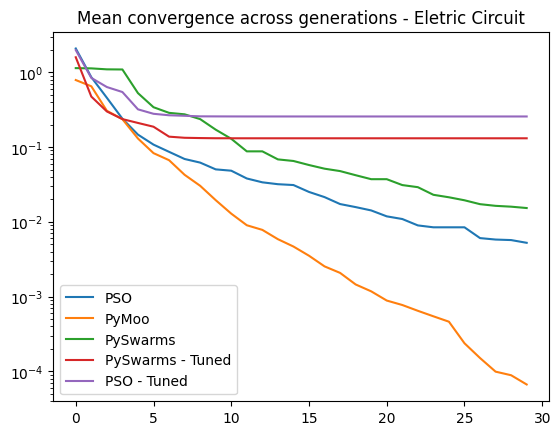

In [25]:
plt.plot(np.mean(circuit_exp["fitness"], axis=0), label="PSO")
plt.plot(np.mean(pymoo_circuit["fitness"], axis=0), label="PyMoo")
plt.plot(np.mean(ps_circuit, axis=0), label="PySwarms")
plt.plot(np.mean(tuned_ps_circuit, axis=0), label="PySwarms - Tuned")
plt.plot(np.mean(tuned_circuit["fitness"], axis=0), label="PSO - Tuned")
plt.yscale("log")

plt.title("Mean convergence across generations - Eletric Circuit")
plt.legend()
plt.show()

/var/folders/17/fvcftbh93gv7xkd67fy2ddkr0000gn/T/ipykernel_27350/1441829240.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


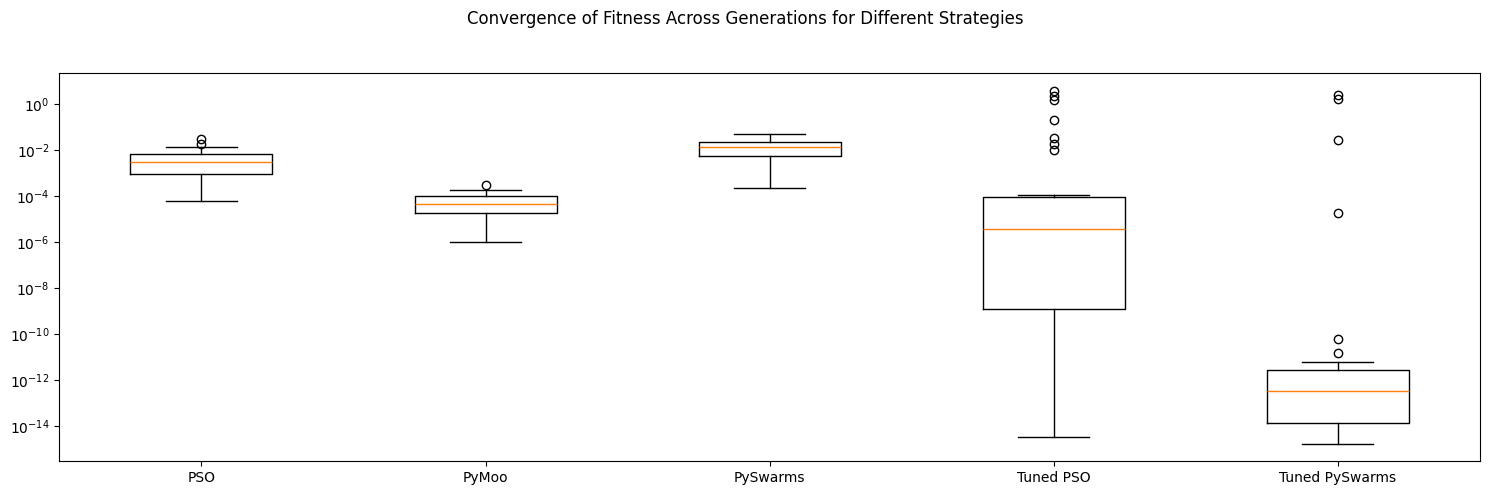

In [27]:
fig = plt.figure(figsize=(15, 5))

data = [circuit_exp["fitness"][:, 29]] + [pymoo_circuit["fitness"][:, 29]] + [ps_circuit[:, 29]] + [tuned_circuit["fitness"][:, 29]] + [tuned_ps_circuit[:, 29]]

labels = ["PSO", "PyMoo", "PySwarms", "Tuned PSO", "Tuned PySwarms"]
plt.boxplot(data, labels=labels)
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Strategies")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()